In [1]:
import datetime
from datetime import datetime

import numpy as np
import pandas as pd
import panel as pn
import seaborn as sns
import spotipy

from matplotlib import pyplot as plt
from dateutil import parser
from spotipy.oauth2 import SpotifyClientCredentials
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier






from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import cv
from xgboost import XGBClassifier
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import urllib



#os.environ['SPOTIPY_CLIENT_ID'] = 'your client id'
#os.environ['SPOTIPY_CLIENT_SECRET' = 'your client secret'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [73]:
name = 'The Strokes'
results = spotify.search(q='artist:' + name, type='artist')
uri = results['artists']['items'][0]['uri']
results = spotify.artist_albums(uri, album_type='album')
albums = results['items']

albums_dict = {}
for i, album in enumerate(albums.__reversed__()):
    if album['name'] not in albums_dict.keys():
        albums_dict[album['name']] = album['uri']
      
albums_dict

{'Is This It': 'spotify:album:2yNaksHgeMQM9Quse463b5',
 'Room On Fire': 'spotify:album:3HFbH1loOUbqCyPsLuHLLh',
 'First Impressions Of Earth': 'spotify:album:6jb1VsNC9eH2A1PnHUZJkC',
 'Angles': 'spotify:album:6Jx4cGhWHewTcfKDJKguBQ',
 'Comedown Machine': 'spotify:album:4WnkQO4xD9ljQooB3VIxCV',
 'The New Abnormal': 'spotify:album:2xkZV2Hl1Omi8rk2D7t5lN'}

In [74]:
tracks_dict = {}
for key in albums_dict:
    for track in spotify.album_tracks(albums_dict[key])['items']:
        tracks_dict[track['id']] = key
        
tracks_dict

{'2pAD0PKMUMtxlMvz33tYzB': 'Is This It',
 '1EsgUWQsxGBwnu3NATDjiU': 'Is This It',
 '7G8hUONVhvJnkD3Ak8mNF1': 'Is This It',
 '4KC2Z9dL4jL61Ys35N6srg': 'Is This It',
 '56NkIxSZZiMpFP5ZNSxtnT': 'Is This It',
 '4pXyK9GW7fuT645U0DLYYF': 'Is This It',
 '7kzKAuUzOITUauHAhoMoxA': 'Is This It',
 '2LMloFiV7DHpBhITOaBSam': 'Is This It',
 '7xuu4ByQkm8qhnwJQk994r': 'Is This It',
 '37cb7mzkQKksGm0noGDXeh': 'Is This It',
 '0J2OnBNKwt0KICDyDFPUvl': 'Is This It',
 '78Gzxi27GuNHTfkn2BylG4': 'Room On Fire',
 '57Xjny5yNzAcsxnusKmAfA': 'Room On Fire',
 '6DUKQUhWqUySYngLXLNwP2': 'Room On Fire',
 '6Yu1OL8I0D4vjOzYdsXYGK': 'Room On Fire',
 '6lnnaGN20kl0jEYJSxCgU9': 'Room On Fire',
 '5OmumaYiHYXUsYZPGLFTYJ': 'Room On Fire',
 '08l9WKDuRyGeStQ9ojTlFh': 'Room On Fire',
 '3kKb3U3a8jmUJQB9ypE1Jl': 'Room On Fire',
 '5MZBOcqI3Vpvp2PZy6ddyD': 'Room On Fire',
 '0dy6iXYIF0piirySAzCBwF': 'Room On Fire',
 '7eX5SypK35V8Y9d9pS6rWy': 'Room On Fire',
 '5LXDkzoej7blL7PbNM1Zin': 'First Impressions Of Earth',
 '0VDISk30jGCQIuTYL

In [75]:
'''
Now we need the ID of some track just to retrieve the available parameters list.
'''

track_name = input('Type the name of any track:')

try:
    results = spotify.search(q='track:' + track_name, type='track')
    items = results['tracks']['items']
    track_id = items[0]['id']
except:
    raise Exception('Could not find any track with this name. Try again!')

print(f'''\nFirst result is "{items[0]['name']}" by "{items[0]['artists'][0]['name']}". The ID is: {track_id}''')


Type the name of any track:as

First result is "As It Was" by "Harry Styles". The ID is: 4LRPiXqCikLlN15c3yImP7


In [76]:
parameters = list(spotify.audio_features(tracks=track_id)[0].keys())
parameters

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [77]:
unwanted = ['type','id','uri','track_href','analysis_url']
parameters = [parameter for parameter in parameters if parameter not in unwanted]
parameters

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [78]:
features_dict = {}
for j, key in enumerate(tqdm(tracks_dict)):
    features_dict[j] = {}
    features_dict[j]['album'] = tracks_dict[key]
    track_features = spotify.audio_features(tracks=key)[0]
    for parameter in parameters:
        features_dict[j][parameter] = track_features[parameter]

#features_dict

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:14<00:00,  4.56it/s]


In [79]:
df0 = pd.DataFrame(features_dict).T
#df0.drop(['energy','loudness','key','time_signature'],axis=1,inplace=True)
df0.tail()

,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
61,The New Abnormal,0.617,0.78,7,-4.466,0,0.0376,0.0141,0.0112,0.0833,0.326,93.951,375320,4
62,The New Abnormal,0.456,0.323,10,-6.764,1,0.0318,0.858,0.00913,0.146,0.363,116.903,310373,4
63,The New Abnormal,0.579,0.714,0,-4.455,1,0.0347,0.00258,0.0269,0.111,0.299,109.971,275667,4
64,The New Abnormal,0.353,0.613,9,-5.9,1,0.031,0.384,0.0123,0.103,0.282,177.375,337333,4
65,The New Abnormal,0.426,0.617,1,-5.423,0,0.0289,0.341,0.181,0.101,0.201,92.002,351787,4


In [80]:
categorical_features = ['key', 'mode', 'time_signature']
df = df0.copy()
for feature in categorical_features:
    dummies = pd.get_dummies(df0[feature], prefix=feature)
    df = pd.concat([df.drop([feature], axis=1), dummies], axis=1)   

df.tail()

/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/home/hcsg/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_3,time_signature_4,time_signature_5
61,The New Abnormal,0.617,0.78,-4.466,0.0376,0.0141,0.0112,0.0833,0.326,93.951,...,1,0,0,0,0,1,0,0,1,0
62,The New Abnormal,0.456,0.323,-6.764,0.0318,0.858,0.00913,0.146,0.363,116.903,...,0,0,0,1,0,0,1,0,1,0
63,The New Abnormal,0.579,0.714,-4.455,0.0347,0.00258,0.0269,0.111,0.299,109.971,...,0,0,0,0,0,0,1,0,1,0
64,The New Abnormal,0.353,0.613,-5.9,0.031,0.384,0.0123,0.103,0.282,177.375,...,0,0,1,0,0,0,1,0,1,0
65,The New Abnormal,0.426,0.617,-5.423,0.0289,0.341,0.181,0.101,0.201,92.002,...,0,0,0,0,0,1,0,0,1,0


In [81]:
df['album'].unique()

array(['Is This It', 'Room On Fire', 'First Impressions Of Earth',
       'Angles', 'Comedown Machine', 'The New Abnormal'], dtype=object)

In [82]:
unwanted_albums = ['Favourite Worst Nightmare (Standard Version)', 'Live at the Royal Albert Hall']

for unwanted_album in unwanted_albums:
    df.drop(df[df['album'] == unwanted_album].index, inplace=True)
    
df['album'].unique()

array(['Is This It', 'Room On Fire', 'First Impressions Of Earth',
       'Angles', 'Comedown Machine', 'The New Abnormal'], dtype=object)

In [83]:
def make_heatmap(df):
    mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))
    with sns.axes_style('white'):
        sns.heatmap(df.corr().abs(), cmap='BrBG', mask=mask, vmin=-1, vmax=1)

/tmp/ipykernel_840/3605427709.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))


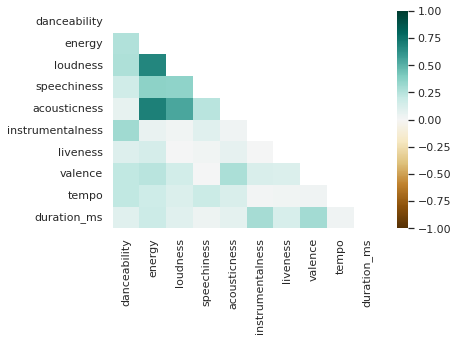

In [84]:
base_df = df.iloc[:,1:11].astype('float')
make_heatmap(base_df)

/tmp/ipykernel_840/3605427709.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))


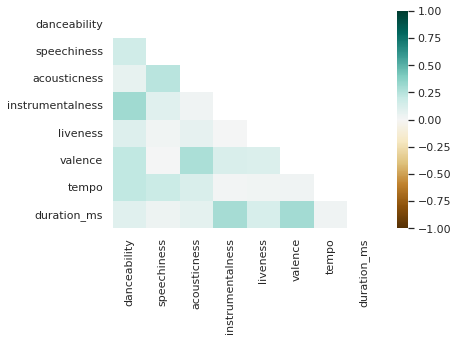

In [85]:
base_df.drop(['energy','loudness'], axis=1, inplace=True)
make_heatmap(base_df)

In [86]:
X = df.iloc[:,1:]
scaler_X = StandardScaler()
scaler = scaler_X.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(columns=X.columns,data=X_scaled)
y = df.iloc[:,:1]
le = LabelEncoder()

y = le.fit_transform(y.values.ravel())
y = y.astype(np.float64)
x = X_scaled.iloc[:,:].to_numpy()
y_ = y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

In [90]:
'''
Comparing Classifiers

'''
classifiers_1 = [
    XGBClassifier(n_estimators=100),
    DecisionTreeClassifier(max_depth=70),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42),
    ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),  
    KNeighborsClassifier(3)
]

classifiers_2 = [
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=.1),
    GradientBoostingClassifier(learning_rate=0.1, random_state=10),
    HistGradientBoostingClassifier(max_iter=100)
]

for classifier in classifiers_1:
    print(str(classifier))
    classifier.fit(train_x,train_y)
    ypred=classifier.predict(test_x)
    result1 = classification_report(test_y, ypred)
    print (result1)
    result2 = accuracy_score(test_y,ypred)
    print('Accuracy:',result2)
    
tmp_df = pd.DataFrame(train_y)
train_y_decoded = tmp_df.apply(lambda x: x.argmax(), axis=1).values
tmp_df = pd.DataFrame(test_y)
test_y_decoded = tmp_df.apply(lambda x: x.argmax(), axis=1).values
    
for classifier in classifiers_2:
    
    print(str(classifier))
    classifier.fit(train_x,train_y_decoded)
    ypred=classifier.predict(test_x)
    tmp_df = pd.DataFrame(ypred,columns=['album'])
    ypred_encoded = pd.get_dummies(tmp_df['album']).to_numpy()
    result1 = classification_report(test_y, ypred_encoded)
    print (result1)
    result2 = accuracy_score(test_y,ypred_encoded)
    print('Accuracy:',result2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         3
           3       0.50      0.

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         4
           4       1.00      0.25      0.40         4
           5       1.00      0.33      0.50         3

   micro avg       1.00      0.25      0.40        20
   macro avg       0.50      0.26      0.32        20
weighted avg       0.50      0.25      0.30        20
 samples avg       0.25      0.25      0.25        20

Accuracy: 0.25
ExtraTreesClassifier(n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.67      0.67      0.67         3
           3       1.00      0.50      0.67         4
           4       1.00      0.25      0.40         4
         

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hcsg/anaconda3/lib/python3.9/si

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.50      0.33         2
           2       0.38      1.00      0.55         3
           3       0.75      0.75      0.75         4
           4       1.00      0.50      0.67         4
           5       0.00      0.00      0.00         3

   micro avg       0.45      0.45      0.45        20
   macro avg       0.40      0.46      0.38        20
weighted avg       0.43      0.45      0.40        20
 samples avg       0.45      0.45      0.45        20

Accuracy: 0.45
GradientBoostingClassifier(random_state=10)
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.50      0.50         2
           2       0.50      1.00      0.67         3
           3       1.00      0.25      0.40         4
           4       0.43      0.75      0.55         4
           5       

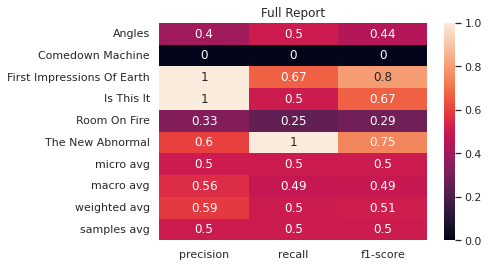

In [91]:
'''Choosing Decision Trees'''

train_x = pd.DataFrame(train_x,columns=df.columns.values[1:])
test_x = pd.DataFrame(test_x,columns=df.columns.values[1:])

clf = DecisionTreeClassifier(max_depth=70)#DecisionTreeClassifier(max_depth=70)
clf.fit(train_x,train_y)
ypred=clf.predict(test_x)
result1 = classification_report(test_y, ypred, output_dict=True)

df_report = pd.DataFrame(result1).iloc[:-1, :].T

keys_encoded = list(result1.keys())[:-4]
keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
df_report.index = pd.concat([pd.Series(le.inverse_transform(keys_encoded)),
                             pd.Series(list(result1.keys())[-4:])])
                            
sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Full Report')
    sns.heatmap(df_report, annot=True)


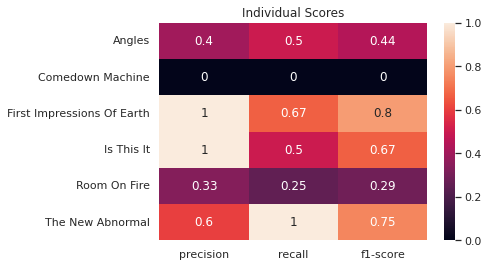

In [92]:
df_report = pd.DataFrame(result1).iloc[:-1, :-4].T

keys_encoded = list(result1.keys())[:-4]
keys_encoded = [int(key_encoded) for key_encoded in keys_encoded]
df_report.index = pd.Series(le.inverse_transform(keys_encoded))                     

sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Individual Scores')
    sns.heatmap(df_report, annot=True)

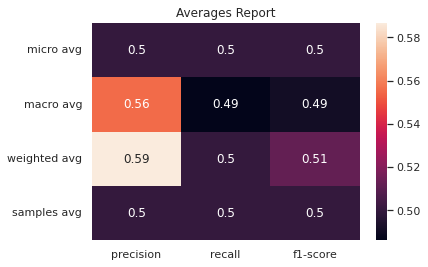

In [93]:
end_report = pd.DataFrame(result1).iloc[:-1, -4:].T
sns.reset_orig()
with sns.axes_style('white'):
    a = sns.set(rc={})
    plt.title('Averages Report')
    sns.heatmap(end_report, annot=True)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_dump'

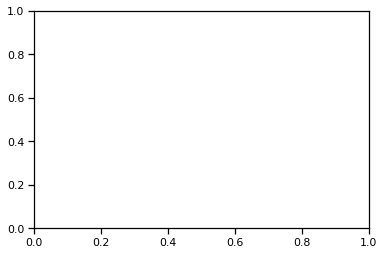

In [94]:
# '''
# you'll probably need to sudo apt-get install graphviz
# '''

# import matplotlib.pyplot as plt

# xgb.plot_tree(clf,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 50]
# plt.show()

# '''
# still need to decode this leaf
# '''

In [ ]:
# with plt.style.context('Solarize_Light2'):  
#     plt.rcParams['figure.figsize'] = [5,5]
#     xgb.plot_importance(clf)
    
#     plt.show()

In [95]:
#probably a better way to do this

pn.extension()

danceability = pn.widgets.FloatSlider(
    name='danceability', 
    start=df0['danceability'].min(), 
    end=df0['danceability'].max(), 
    step=0.01, 
    value=df0['danceability'].mean()
)
energy = pn.widgets.FloatSlider(
    name='energy', 
    start=df0['energy'].min(), 
    end=df0['energy'].max(), 
    step=0.01, 
    value=df0['energy'].mean()
)
loudness = pn.widgets.FloatSlider(
    name='loudness', 
    start=df0['loudness'].min(),
    end=df0['loudness'].max(), 
    step=0.01, 
    value=df0['loudness'].mean()
)
speechiness = pn.widgets.FloatSlider(
    name='speechiness', 
    start=df0['speechiness'].min(), 
    end=df0['speechiness'].max(), 
    step=0.01, 
    value=df0['speechiness'].mean()
)
acousticness = pn.widgets.FloatSlider(
    name='acousticness', 
    start=df0['acousticness'].min(), 
    end=df0['acousticness'].max(), 
    step=0.01, 
    value=df0['acousticness'].mean()
)
instrumentalness = pn.widgets.FloatSlider(
    name='instrumentalness', 
    start=df0['instrumentalness'].min(), 
    end=df0['instrumentalness'].max(), 
    step=0.01, 
    value=df0['instrumentalness'].mean()
)
liveness = pn.widgets.FloatSlider(
    name='liveness', 
    start=df0['liveness'].min(), 
    end=df0['liveness'].max(), 
    step=0.01, 
    value=df0['liveness'].mean()
)
valence = pn.widgets.FloatSlider(
    name='valence', 
    start=df0['valence'].min(), 
    end=df0['valence'].max(), 
    step=0.01, 
    value=df0['valence'].mean()
)
tempo = pn.widgets.FloatSlider(
    name='tempo', 
    start=df0['tempo'].min(), 
    end=df0['tempo'].max(), 
    step=1, 
    value=df0['tempo'].mean()
)
duration_min = pn.widgets.FloatSlider(
    name='duration_min', 
    start=df0['duration_ms'].min()/60000, 
    end=df0['duration_ms'].max()/60000, 
    step=0.1, 
    value=df0['duration_ms'].mean()/60000
)
key = pn.widgets.DiscreteSlider(
    name='key', 
    options={'C':0,'Db':1,'D':2,'Eb':3,'E':4,'F':5,'Gb':6,'G':7,'Ab':8,'A':9,'Bb':10,'B':11}, 
    value='C'
)
mode = pn.widgets.DiscreteSlider(
    name='mode', 
    options={'Minor':0,'Major':1}, 
    value='Minor'
)
time_signature = pn.widgets.DiscreteSlider(
    name='time_signature', 
    options={'3/4':3,'4/4':4,'5/4':5,'6/4':6,'7/4':7}, 
    value='4/4'
)

pn.Column(danceability, energy, loudness, speechiness, acousticness, instrumentalness,
          liveness, valence, tempo, duration_min, key, mode, time_signature,
          background = '#3f3f3f')

Column(background='#3f3f3f')
    [0] FloatSlider(end=0.737, name='danceability', start=0.0973, step=0.01, value=0.5053681818181819)
    [1] FloatSlider(end=0.983, name='energy', start=0.241, step=0.01, value=0.7534696969696968)
    [2] FloatSlider(end=-2.305, name='loudness', start=-14.779, step=0.01, value=-5.595454545454546)
    [3] FloatSlider(end=0.123, name='speechiness', start=0.0255, step=0.01, value=0.040274242424242435)
    [4] FloatSlider(end=0.983, name='acousticness', start=3.34e-06, step=0.01, value=0.09579267181818181)
    [5] FloatSlider(end=0.955, name='instrumentalness', start=1.51e-06, step=0.01, value=0.3699975440909091)
    [6] FloatSlider(end=0.558, name='liveness', start=0.0541, step=0.01, value=0.16203636363636367)
    [7] FloatSlider(end=0.969, name='valence', start=0.078, step=0.01, value=0.5478454545454544)
    [8] FloatSlider(end=199.866, name='tempo', start=75.164, step=1, value=127.49065151515151)
    [9] FloatSlider(end=6.255333333333334, name='duration_min', start=2.362216666666667, value=3.639021212121212)
    [10] DiscreteSlider(formatter='%d', name='key', options={'C': 0, 'Db': 1, ...}, value=0)
    [11] DiscreteSlider(formatter='%d', name='mode', options={'Minor': 0, 'Major': 1}, value=0)
    [12] DiscreteSlider(formatter='%d', name='time_signature', options={'3/4': 3, '4/4': 4, ...}, value=3)

In [102]:
#creating new data dict from inputted values

new_data_raw = {
    'danceability': danceability.value,
    'energy': energy.value,
    'key': key.value,
    'loudness': loudness.value,
    'mode': mode.value,
    'speechiness': speechiness.value,
    'acousticness': acousticness.value,
    'instrumentalness': instrumentalness.value,
    'liveness': liveness.value,
    'valence': valence.value,
    'tempo': tempo.value,
    'duration_ms': duration_min.value*60000,
    'time_signature': time_signature.value
}

new_data_raw[f'key_{key.value}'] = 1
new_data_raw[f'mode_{mode.value}'] = 1
new_data_raw[f'time_signature_{time_signature.value}'] = 1
new_data_raw.pop('key', 'No Key found')
new_data_raw.pop('mode', 'No Key found')
new_data_raw.pop('time_signature', 'No Key found')

7

In [103]:
dfx = pd.DataFrame(new_data_raw, index=[0], columns=test_x.columns).fillna(0)
arr = dfx.values
a = scaler.transform(arr)
new_data_df = pd.DataFrame(a, index=[0], columns= test_x.columns)

new_data_pred = clf.predict(new_data_df)
new_data_pred

#assert new_data_pred.sum() == 1, 'too wild of an input'

/home/hcsg/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 1.]])

The song you just created would probably be in The New Abnormal!


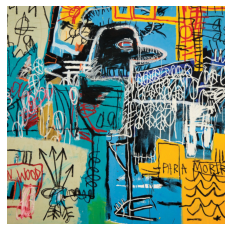

In [104]:
predicted_album = le.inverse_transform(new_data_pred[0].astype('bool'))
pred_uri = albums_dict[predicted_album[0]]
url = spotify.albums([pred_uri])['albums'][0]['images'][0]['url']

f = urllib.request.urlopen(url)
a = plt.imread(f, format='jpg')

print(f'The song you just created would probably be in {predicted_album[0]}!')

#plt.figure(figsize = (15,15))
plt.axis('off')
_ = plt.imshow(a)
